* 2023-09-18
* 작성자 : 신재호
* 파이토치와 트랜스포머를 활용한 자연어처리와 컴퓨터비전 심층학습->수정본

# 3장 파이토치 기초(p.45~)

* torch.Tensor와 torch.tensor 둘 다 사용가능하지만, torch.Tensor를 사용하는 것이 권장됨
* torch.tensor는 자료형을 자동으로 할당하기 때문에, 의도치 않은 자료형으로 변환될 위험이 있음

In [ ]:
import torch

print("torch.tensor")
print(torch.tensor([1,2,3]), torch.tensor([1,2,3]).type())
print(torch.tensor([1.,2.,3.]), torch.tensor([1.,2.,3.]).type())
print("torch.Tensor")
print(torch.Tensor([1,2,3]), torch.Tensor([1,2,3]).type())
print(torch.Tensor([1., 2., 3.]), torch.Tensor([1,2,3]).type())

torch.tensor
tensor([1, 2, 3]) torch.LongTensor
tensor([1., 2., 3.]) torch.FloatTensor
torch.Tensor
tensor([1., 2., 3.]) torch.FloatTensor
tensor([1., 2., 3.]) torch.FloatTensor


* 텐서의 속성
* shape, dtype, device

In [ ]:
import torch

tensor = torch.rand(1,2)
gpu_tensor = torch.rand(1,2).cuda()

print(tensor)
print(f'shape  : {tensor.shape}')
print(f'dtype  : {tensor.dtype}')
print('cpu')
print(f'device : {tensor.device}')
print('gpu')
print(f'device : {gpu_tensor.device}')

tensor([[0.6853, 0.2734]])
shape  : torch.Size([1, 2])
dtype  : torch.float32
cpu
device : cpu
gpu
device : cuda:0


* 차원변환

In [ ]:
import torch

tensor = torch.rand(1,2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2,1)
print(tensor)
print(tensor.shape)

tensor([[0.1722, 0.6951]])
torch.Size([1, 2])
tensor([[0.1722],
        [0.6951]])
torch.Size([2, 1])


* 자료형

In [ ]:
import torch

tensor = torch.rand((3,3), dtype = torch.float)
print(tensor)
print(tensor.type())

tensor([[0.8465, 0.5042, 0.7645],
        [0.3719, 0.9645, 0.8838],
        [0.0980, 0.3306, 0.1998]])
torch.FloatTensor


* 장치설정

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
cpu_tensor = torch.FloatTensor([1,2,3])
gpu_tensor = torch.cuda.FloatTensor([1,2,3])
tensor = torch.rand((1,1), device = device)
print(device)
print(cpu_tensor)
print(gpu_tensor)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.8230]], device='cuda:0')


* 장치변환
*  GPU를 사용하는 텐서와 CPU를 사용하는 텐서 간의 연산은 불가능함

In [ ]:
import torch

cpu_tensor = torch.FloatTensor([1,2,3])
gpu_tensor = cpu_tensor.cuda()
gpu2cpu = gpu_tensor.cpu()
cpu2gpu = cpu_tensor.to("cuda")
print('CPU :', cpu_tensor)
print('GPU :', gpu_tensor)
print('CPU :', gpu2cpu)
print('GPU :', cpu2gpu)

CPU : tensor([1., 2., 3.])
GPU : tensor([1., 2., 3.], device='cuda:0')
CPU : tensor([1., 2., 3.])
GPU : tensor([1., 2., 3.], device='cuda:0')


* 넘파이 배열 -> 토치텐서

In [ ]:
import numpy as np
import torch

np_array = np.array([1,2,3], dtype = np.uint8)
print(torch.tensor(np_array))
print(torch.Tensor(np_array))
print(torch.from_numpy(np_array))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


* 토치텐서 -> 넘파이 배열

In [ ]:
import torch
# GPU에 tensor를 load
tensor = torch.cuda.FloatTensor([1,2,3])
# CPU에 ndarray를 load
# detach를 통해서 gpu와 연결해제
np_array = tensor.detach().cpu().numpy()
print(np_array)
print(type(np_array))

[1. 2. 3.]
<class 'numpy.ndarray'>


* pytorch image 배열 처리

# 단순 선형회귀
* 손실함수 < 비용함수 < 목적함수
* 손실함수 : 단일 샘플의 실젯값과 예측값의 차이가 발생했을 떄 오차가 얼마인지 계산하는 함수
* 비용함수 : 전체 데이터에 대한 오차를 계산하는 함수
* 목적함수 : 함수값의 결과를 최댓값 또는 최솟값으로 최적화하는 함수

In [ ]:
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [ ]:
def  simpleregression(x, y, weight, bias, epoch, learning_rate):
    '''
    batch를 적용한 방식임.
    '''
    print('learning_rate = {}'.format(learning_rate))
    for epoch  in range(epoch):
        y_hat = weight * x + bias
        # 비용함수
        cost = ((y - y_hat)**2).mean()

        # 가중치
        # weight를 편미분하므로 x를 곱함
        weight = weight - learning_rate * ((y_hat - y)*x).mean()

        # 편향
        bias = bias - learning_rate * (y_hat - y).mean()
        '''
        print("epoch : {}, cost : {}, weight : {}, bias : {}".format(epoch,
                                                                     cost,
                                                                     weight,
                                                                     bias))
        '''
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

import matplotlib.pyplot as plt

def plot_maker(x,y,weight,bias,lr):
    plt.scatter(x,y)
    y_hat = weight * x - bias
    plt.plot(x, y_hat, color = 'red')
    plt.title(f'lr = {lr}')
    plt.show()

learning_rate = 0.001
Epoch : 1000, Weight : 0.860, Bias : -0.059, Cost : 1.406
Epoch : 2000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 3000, Weight : 0.867, Bias : -0.201, Cost : 1.385
Epoch : 4000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 5000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 6000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 7000, Weight : 0.874, Bias : -0.345, Cost : 1.374
Epoch : 8000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 9000, Weight : 0.876, Bias : -0.379, Cost : 1.373
Epoch : 10000, Weight : 0.877, Bias : -0.391, Cost : 1.373


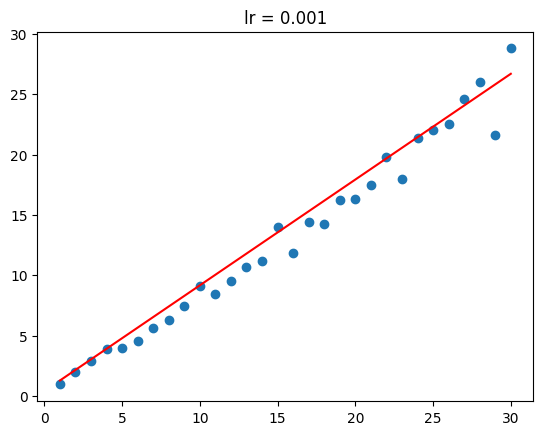

In [ ]:
# 1 p.77(1)
weight = 0.0
bias = 0.0
epoch = 10000
learning_rate = 0.001

simpleregression(x = x, y = y, weight = weight, bias = bias, epoch = epoch, learning_rate = learning_rate)

plot_maker(x = x, y = y, weight = 0.877, bias = -0.391, lr = 0.001)

learning_rate = 0.006
Epoch : 1000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 2000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 3000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.434, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


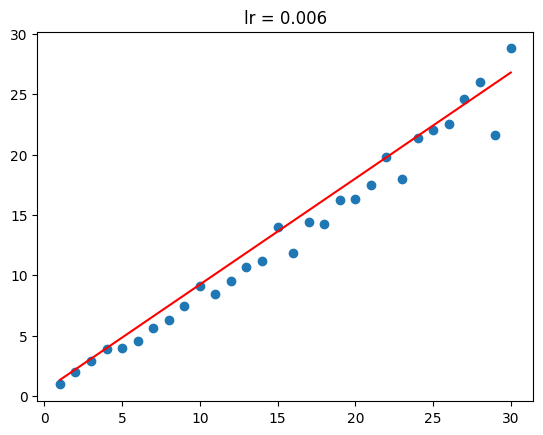

In [ ]:
# 2 p.77(2)
weight = 0.0
bias = 0.0
epoch = 10000
learning_rate = 0.006

simpleregression(x = x, y = y, weight = weight, bias = bias, epoch = epoch, learning_rate = learning_rate)

plot_maker(x = x, y = y, weight = 0.879, bias = -0.436, lr = 0.006)

* 단순선형회귀 파이토치

In [ ]:
import torch
from torch import optim

In [ ]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [ ]:
# autograd 자동미분기능(역전파)

weight = torch.zeros(1, requires_grad = True)
bias = torch.zeros(1, requires_grad = True)
learning_rate = 0.001

print('weight : {}\nbias : {}'.format(weight, bias))

weight : tensor([0.], requires_grad=True)
bias : tensor([0.], requires_grad=True)


# 옵티마이저 (torch.optim)
* https://pytorch.org/docs/stable/optim.html

In [ ]:
# 옵티마이저 설정
# torch.optim
optimizer = optim.SGD([weight, bias], lr = learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

* 파이토치 가중치 갱신
* zero_grad : 옵티마이저 기울기 초기화
* cost.backward :  역전파
* optimizer : 기울기 갱신

In [ ]:
for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost:{cost:.3f}")

Epoch: 1000, Weight : 0.864, Bias : -0.138, Cost:1.393
Epoch: 2000, Weight : 0.870, Bias : -0.251, Cost:1.380
Epoch: 3000, Weight : 0.873, Bias : -0.321, Cost:1.375
Epoch: 4000, Weight : 0.875, Bias : -0.364, Cost:1.373
Epoch: 5000, Weight : 0.877, Bias : -0.391, Cost:1.373
Epoch: 6000, Weight : 0.878, Bias : -0.408, Cost:1.372
Epoch: 7000, Weight : 0.878, Bias : -0.419, Cost:1.372
Epoch: 8000, Weight : 0.878, Bias : -0.425, Cost:1.372
Epoch: 9000, Weight : 0.879, Bias : -0.429, Cost:1.372
Epoch: 10000, Weight : 0.879, Bias : -0.432, Cost:1.372


* zero_grad 사용하는 이유

In [ ]:
temp = torch.tensor(2.0, requires_grad = True)

for i in range(5):
    z = 2*temp
    z.backward()
    print(f'역전파 {i+1}번 grad:',temp.grad)

역전파 1번 grad: tensor(2.)
역전파 2번 grad: tensor(4.)
역전파 3번 grad: tensor(6.)
역전파 4번 grad: tensor(8.)
역전파 5번 grad: tensor(10.)


In [ ]:
temp = torch.tensor(2.0, requires_grad = True)

for i in range(5):
    temp.grad = torch.tensor(0.)
    z = 2*temp

    z.backward()
    print(f'역전파 {i+1}번 grad:',temp.grad)

역전파 1번 grad: tensor(2.)
역전파 2번 grad: tensor(2.)
역전파 3번 grad: tensor(2.)
역전파 4번 grad: tensor(2.)
역전파 5번 grad: tensor(2.)


* gradient들은 1에포크에서 역할을 다한 것이므로 초기화 해주어야함

# 신경망 (torch.nn)
* https://pytorch.org/docs/stable/nn.html

In [ ]:
from torch import nn

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [ ]:
# 모델
model = nn.Linear(1,1, bias = True)
# 손실함수
criterion = nn.MSELoss()
# 옵티마이저
# optim.SGD([weight, bias], learning_rate = 0.001)
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
for epoch in range(3000):
    output = model(x)
    cost = criterion(output, y)

    # [1] 옵티마이저값 초기화
    optimizer.zero_grad()
    # [2] 손실함수 역전파 수행
    cost.backward()
    # [3] 가중치 갱신
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8706]], requires_grad=True), Parameter containing:
tensor([-0.2664], requires_grad=True)], Cost : 1.379
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8737]], requires_grad=True), Parameter containing:
tensor([-0.3304], requires_grad=True)], Cost : 1.375
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8757]], requires_grad=True), Parameter containing:
tensor([-0.3703], requires_grad=True)], Cost : 1.373


# 비선형회귀

In [ ]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# 사용자 정의 데이터세트
class CustomDataset(Dataset):
    '''
    데이터세트를 상속받아 커스텀 데이터세트를 생성
    '''
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        '''
        y = w1 * (x**2) + w2 * x + bias
        x = [x**2, x]형태
        '''
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

# 사용자 정의 모델
class CustomModel(nn.Module):
    '''
    선형변환함수를 이용한 모델
    '''
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2,1)

    def forward(self, x):
        x = self.layer(x)
        return x

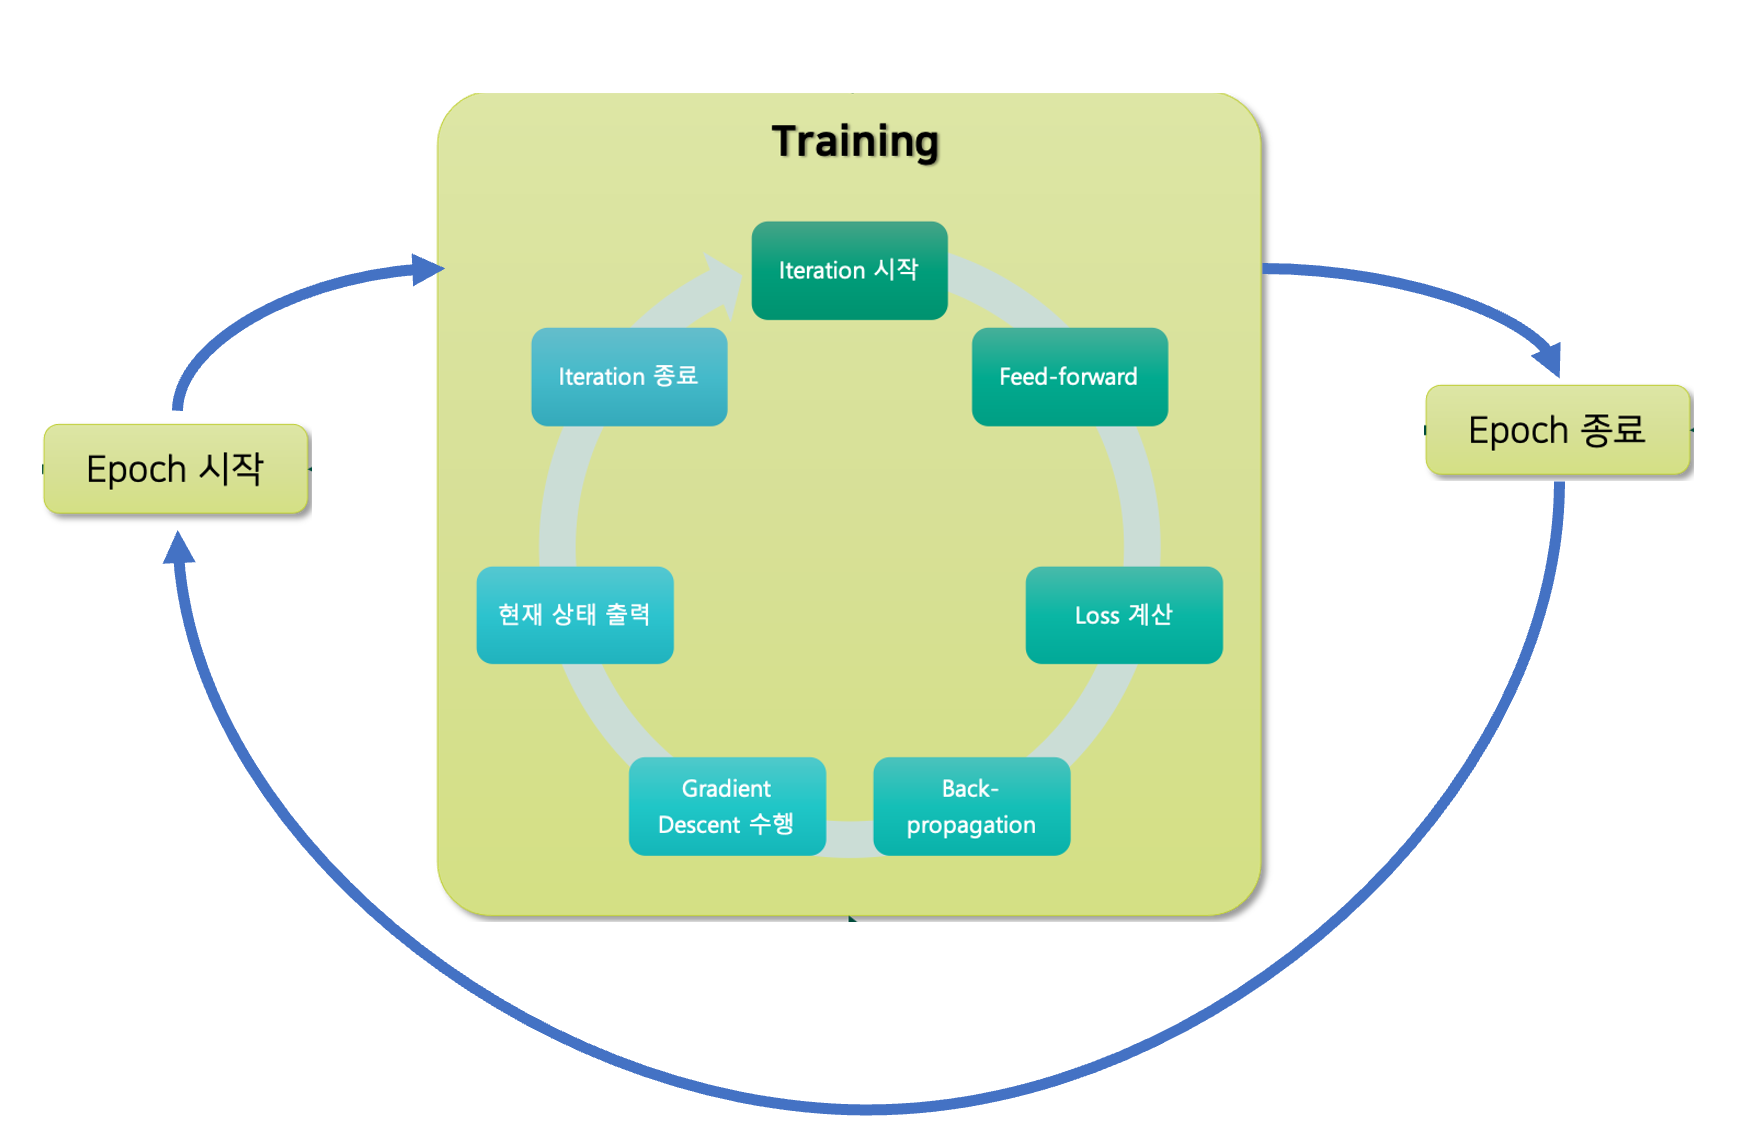

In [ ]:
train_dataset = CustomDataset('./non_linear.csv')
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, drop_last = True)

'''
32 batch
'''
for batch, i in zip(train_loader, range(6)):
    x, y = batch
    print(f'----- batch : {i+1} ------')
    print(f'x : {x.shape}')
    print(f'y : {y.shape}')
    break

----- batch : 1 ------
x : torch.Size([32, 2])
y : torch.Size([32, 1])


In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(),lr = 0.0001)

for epoch in range(10000):
    cost = 0.0

    for batch in train_loader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
    cost = cost/len(train_loader)

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.1046, -1.6956]], requires_grad=True), Parameter containing:
tensor([0.1846], requires_grad=True)], Cost : 0.081
Epoch : 10000, Model : [Parameter containing:
tensor([[ 3.1034, -1.6961]], requires_grad=True), Parameter containing:
tensor([0.2561], requires_grad=True)], Cost : 0.071


<y_hat = 3.0982*(x**2) - 1.6937*x + 0.5967>

* 모델 평가

In [ ]:
# no_grad로 기울기계산을 비활성화해야 메모리 사용량을 줄임
model.eval()
with torch.no_grad():
    inputs = torch.FloatTensor(
        [
            [1**2, 1],
            [5**2, 5],
            [11**2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.6633],
        [ 69.3602],
        [357.1089]])


# 모델 저장하기

In [ ]:
torch.save(
    {
        "Description" : "CustomModel : y = w_1 * x**2 + w_2 * x + bias",
        "epoch" : epoch + 1,
        "model_state_dict" : model.state_dict(),
        "optimizer_state_dict" : optimizer.state_dict(),
        "cost" : cost,
        },
    './first_model_state_dict.pt'
)

# 모델 호출하기

* torch.save()
* torch.load(path = '__경로__', map_location = '__장치__')
* weights_only = True 추가!!

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
state_dict = torch.load('first_model_state_dict.pt', map_location = device, weights_only=True)
for k, v in state_dict.items():
    print(f'{k} : {v}')

Description : CustomModel : y = w_1 * x**2 + w_2 * x + bias
epoch : 10000
model_state_dict : OrderedDict([('layer.weight', tensor([[ 3.1034, -1.6961]])), ('layer.bias', tensor([0.2561]))])
optimizer_state_dict : {'state': {}, 'param_groups': [{'lr': 0.0001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}
cost : 0.07101650536060333


In [ ]:
model.load_state_dict(state_dict['model_state_dict'])
optimizer.load_state_dict(state_dict['optimizer_state_dict'])

# 데이터세트 분리

In [ ]:
from torch.utils.data import random_split

torch.utils.random_split(dataset, length, generator)

In [ ]:
dataset_size = len(dataset)
train_size =  int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Val Data Size : {len(val_dataset)}")
print(f"Test Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True, drop_last = True)
val_dataloader = DataLoader(val_dataset, batch_size = 4, shuffle = True, drop_last = True)
test_dataloader =  DataLoader(test_dataset, batch_size = 4, shuffle = True, drop_last = True)

Training Data Size : 160
Val Data Size : 20
Test Data Size : 20


# 이진분류

In [ ]:
import pandas as pd
pd.read_csv('./binary.csv')

,x,y,z,pass
0,86,22,1,False
1,81,75,91,True
2,54,85,78,True
3,5,58,4,False
4,53,93,100,True
...,...,...,...,...
995,38,30,83,False
996,73,78,85,True
997,52,50,29,False
998,60,66,16,False


In [ ]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:,0].values
        self.x2 = df.iloc[:,1].values
        self.x3 = df.iloc[:,2].values
        self.y = df.iloc[:,3].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        # BCELoss를 사용하므로
        y = torch.FloatTensor([int(self.y[index])])
        return x,y

    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer(x)
        return x

In [ ]:
dataset = CustomDataset('./binary.csv')
dataset_size = len(dataset)
train_size = int(dataset_size * 0.6)
val_size = int(dataset_size * 0.2)
test_size = dataset_size - train_size - val_size

print(train_size)
print(val_size)
print(test_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], torch.manual_seed(4))
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)
val_dataloader = DataLoader(val_dataset, batch_size = 4, shuffle = True, drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size = 4, shuffle = True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)

600
200
200


<img src = 'https://velog.velcdn.com/images/sanha9999/post/ed85f80c-b133-4d7a-a8c3-c677a3bc239d/image.png'>

In [ ]:
def training(dataloader, model, criterion, optimizer, device):
  model.train()
  iter_cost = 0.0
  iter_acc = 0
  for x,y in dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    iter_cost += loss.item()

    prediction = (output.to('cpu') >= 0.5).int()
    iter_acc += (prediction == y.to('cpu')).sum()

  cost = iter_cost / len(dataloader)
  acc = iter_acc / len(dataloader.dataset)
  return cost, acc

def evaluation(dataloader, model, criterion, device):
  model.eval()
  iter_cost = 0.0
  with torch.no_grad():
    for x,y in dataloader:
      x = x.to(device)
      y = y.to(device)

      output = model(x)
      loss = criterion(output, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      iter_cost += loss.item()

      prediction = (output.to('cpu') >= 0.5).int()
      iter_acc += (prediction == y.to('cpu')).sum()

  cost = iter_cost / len(dataloader)
  acc = iter_acc / len(dataloader.dataset)
  return cost

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
low_acc = 0
train_cost_lst = []
train_acc_lst = []
val_cost_lst = []
val_acc_lst = []

for epoch in tqdm(range(500)):
  train_cost, train_acc = training(train_dataloader, model, criterion, optimizer, device)
  val_cost, val_acc = training(train_dataloader, model, criterion, optimizer, device)

  train_cost_lst.append(train_cost)
  train_acc_lst.append(train_acc)
  val_cost_lst.append(val_cost)
  val_acc_lst.append(val_acc)

  if low_acc < val_acc:
    low_acc = val_acc
    torch.save(
        {
            "epoch" : epoch + 1,
            "model_state_dict" : model.state_dict(),
            "optimizer_state_dict" : optimizer.state_dict(),
            "train_cost" : train_cost,
            "val_cost" : val_cost,
            "train_acc" : f'{train_acc * 100:.2f}%',
            "val_acc" : f'{val_acc * 100:.2f}%'
        },
        './best_pt.pt'
    )

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
state_dict = torch.load('best_pt.pt', map_location = device, weights_only = True)
print(state_dict)
best_epoch = state_dict['epoch']

{'epoch': 440, 'model_state_dict': OrderedDict([('layer.0.weight', tensor([[0.0267, 0.0300, 0.0263]])), ('layer.0.bias', tensor([-4.8466]))]), 'optimizer_state_dict': {'state': {0: {'step': tensor(7920.), 'exp_avg': tensor([[-0.7792, -0.8220, -0.8412]]), 'exp_avg_sq': tensor([[8.3024, 8.8143, 8.5087]])}, 1: {'step': tensor(7920.), 'exp_avg': tensor([0.0203]), 'exp_avg_sq': tensor([0.0035])}}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}, 'train_cost': 0.36413268910513985, 'val_cost': 0.358692553308275, 'train_acc': '84.50%', 'val_acc': '87.83%'}


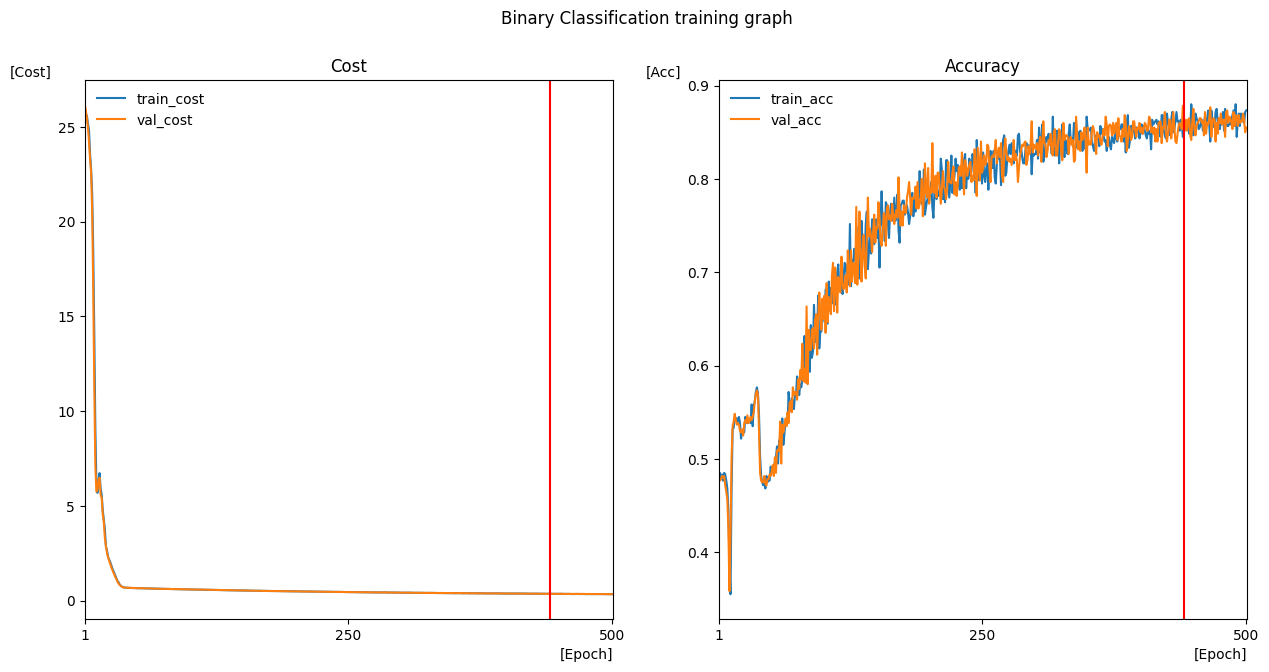

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.plot(train_cost_lst, label = 'train_cost')
plt.plot(val_cost_lst, label = 'val_cost')
plt.legend(frameon = False)
plt.xticks([0,249,499],[1,250,500])
plt.xlim(0,500)
plt.xlabel('[Epoch]', loc = 'right')
plt.ylabel('[Cost]', rotation = 360, loc = 'top')
plt.title('Cost', loc = 'center')
plt.axvline(best_epoch, color = 'red')
plt.subplot(1,2,2)
plt.plot(train_acc_lst, label = 'train_acc')
plt.plot(val_acc_lst, label = 'val_acc')
plt.legend(frameon = False)
plt.xticks([0,249,499],[1,250,500])
plt.xlim(0,500)
plt.xlabel('[Epoch]', loc = 'right')
plt.ylabel('[Acc]', rotation = 360, loc = 'top')
plt.title('Accuracy', loc = 'center')
plt.axvline(best_epoch, color = 'red')
plt.suptitle('Binary Classification training graph')
plt.show()

In [ ]:
model.load_state_dict(state_dict['model_state_dict'])
test_cost, test_acc = training(test_dataloader, model, criterion, optimizer, device)
print(test_cost)
print(f'{test_acc*100:.2f}%')

0.34508208379149435
92.50%


# END(2023-09-18)